<a href="https://colab.research.google.com/github/mochammadcholilurrokhman/PCVK_Ganjil_Mochammad-Cholilur-Rokhman/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TUGAS PRAKTIKUM**

In [1]:
from google.colab import drive

#Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

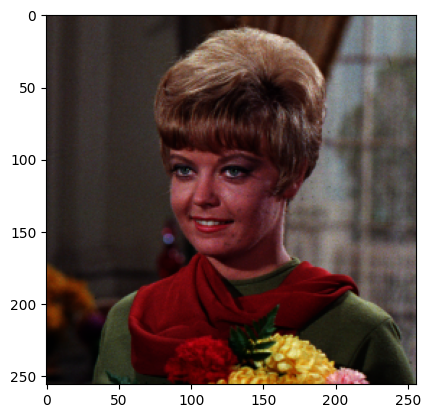

In [9]:
original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
img = (cv.cvtColor(original, cv.COLOR_BGR2RGB)) #konversi channel BGR -> RGB
plt.imshow(img)

**1. Buat Gamma Correction sesuai dengan petunjuk berikut**

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


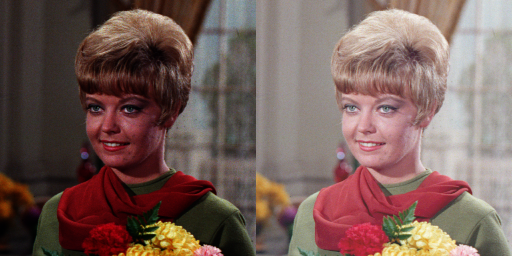

In [10]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

gamma_corrected = np.clip(255 * (original / 255) ** (1 / gamma), 0, 255).astype(np.uint8)

# Menggabungkan gambar asli dan gambar yang telah dikoreksi gamma
final_frame = cv.hconcat([original, gamma_corrected])

# Menampilkan gambar
cv2_imshow(final_frame)

**Hasil Analisa** <br>
*np.clip* digunakan untuk memastikan bahwa nilai piksel yang dihasilkan tetap dalam rentang yang valid [0, 255].

**2. Buat Simulasi Image Depth**

 Image Depth
---------------------------------


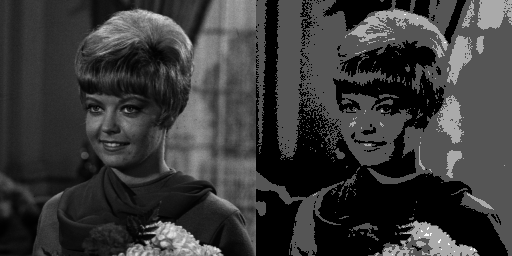

In [23]:
print(' Image Depth')
print('---------------------------------')

# Set bit depth
bit_depth = 2
level = 255 / (pow(2,bit_depth)-1)

# Baca citra masukan dalam mode grayscale
original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff', cv.IMREAD_GRAYSCALE)

# Buat citra dengan kedalaman bit baru
depth_image = np.zeros_like(original, dtype=np.uint8)

# Ubah kedalaman bit dari citra asli ke kedalaman bit yang baru
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        depth_image[y, x] = np.round(original[y, x] / level) * level

# Tampilkan citra asli dan citra dengan kedalaman bit baru
final_frame = cv.hconcat([original, depth_image])

# Menampilkan gambar
cv2_imshow(final_frame)

**Hasil Analisa**


*  *bit_depth* adalah kedalaman bit yang diinginkan.

*   *level* adalah nilai yang digunakan untuk mengubah kedalaman bit dari citra asli. Dalam hal ini, level dihitung sebagai 255 dibagi dengan jumlah level yang tersedia dalam kedalaman bit yang baru.



*   *level* dihitung sebagai 255 / (pow(2, bit_depth) - 1). Untuk bit_depth = 2, level adalah 255 / 3 ≈ 85.
*   *original[y, x]* / level menormalisasi nilai piksel ke rentang baru berdasarkan kedalaman bit yang diinginkan. Misalnya, jika *original[y, x]* = 170, maka *170 / 85 ≈ 2*.



*   *np.round* membulatkan hasil normalisasi ke bilangan bulat terdekat *np.round(170 / 85) = np.round(2) = 2.*
*   Nilai yang telah diubah ini kemudian ditugaskan ke piksel yang sesuai dalam citra baru (*depth_image*).







**3. Buat Modul Average Denoising**



*   Citra 5



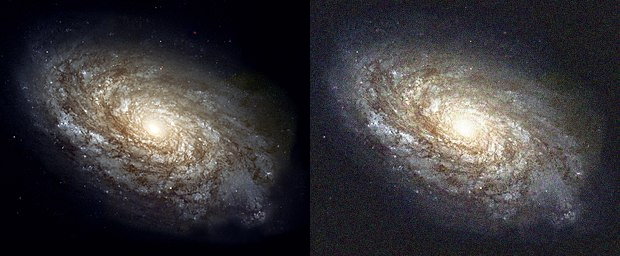

Nilai PSNR adalah 27.544834034928805 (dB)
Nilai MSE adalah 114.44503528225806


In [26]:
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 4 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  #MSE 0 maka tidak ada noise sama sekali, sehingga PNSR tidak memiliki arti
        return 100, mse
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr, mse


compressed = dst
psnr = PSNR(original, compressed)
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)


psnr, mse = PSNR(original, compressed)
print('Nilai PSNR adalah', psnr, '(dB)')
print('Nilai MSE adalah', mse)



*   Citra 10


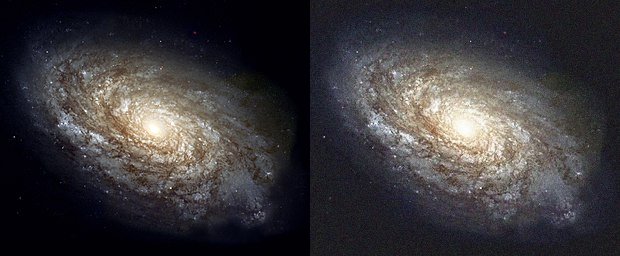

Nilai PSNR adalah 27.554692246434538 (dB)
Nilai MSE adalah 114.185546875


In [27]:
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 9 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  #MSE 0 maka tidak ada noise sama sekali, sehingga PNSR tidak memiliki arti
        return 100, mse
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr, mse


compressed = dst
psnr = PSNR(original, compressed)
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)


psnr, mse = PSNR(original, compressed)
print('Nilai PSNR adalah', psnr, '(dB)')
print('Nilai MSE adalah', mse)


*   Citra 20



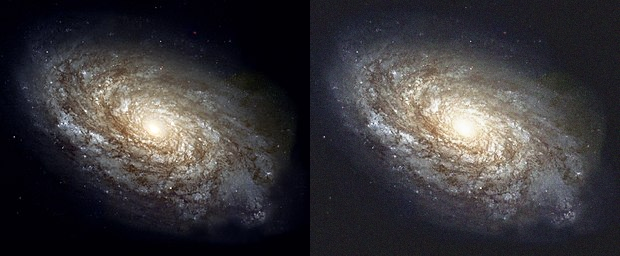

Nilai PSNR adalah 27.542311604322872 (dB)
Nilai MSE adalah 114.51152553763441


In [28]:
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 19 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  #MSE 0 maka tidak ada noise sama sekali, sehingga PNSR tidak memiliki arti
        return 100, mse
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr, mse


compressed = dst
psnr = PSNR(original, compressed)
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)


psnr, mse = PSNR(original, compressed)
print('Nilai PSNR adalah', psnr, '(dB)')
print('Nilai MSE adalah', mse)



*   Citra 40



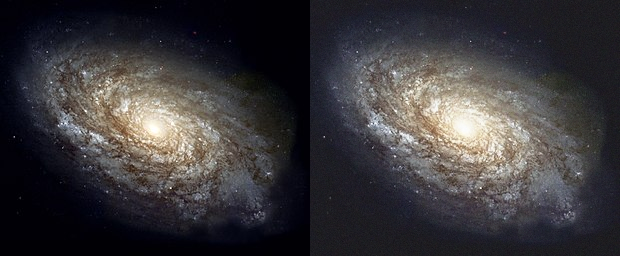

Nilai PSNR adalah 27.500263906451924 (dB)
Nilai MSE adalah 115.62559223790322


In [29]:
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 39 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  #MSE 0 maka tidak ada noise sama sekali, sehingga PNSR tidak memiliki arti
        return 100, mse
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr, mse


compressed = dst
psnr = PSNR(original, compressed)
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)


psnr, mse = PSNR(original, compressed)
print('Nilai PSNR adalah', psnr, '(dB)')
print('Nilai MSE adalah', mse)



*   Citra 80




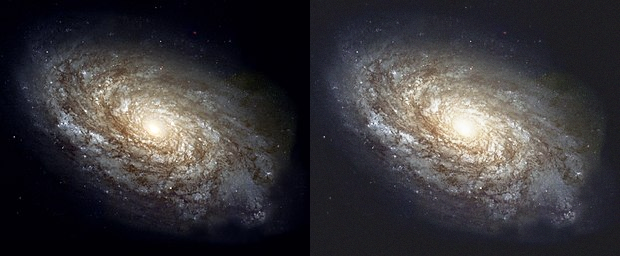

Nilai PSNR adalah 27.500770200076623 (dB)
Nilai MSE adalah 115.61211357526882


In [34]:
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 79 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  #MSE 0 maka tidak ada noise sama sekali, sehingga PNSR tidak memiliki arti
        return 100, mse
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr, mse


compressed = dst
psnr = PSNR(original, compressed)
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)


psnr, mse = PSNR(original, compressed)
print('Nilai PSNR adalah', psnr, '(dB)')
print('Nilai MSE adalah', mse)



*   Citra 100


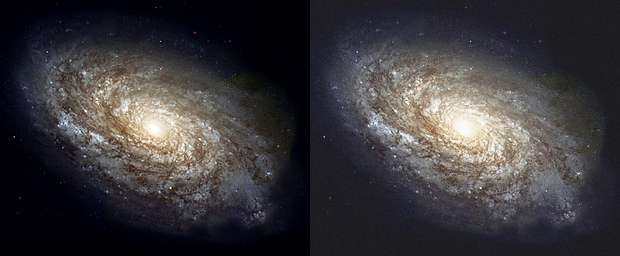

Nilai PSNR adalah 27.508421168372074 (dB)
Nilai MSE adalah 115.40861895161291


In [36]:
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 99 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  #MSE 0 maka tidak ada noise sama sekali, sehingga PNSR tidak memiliki arti
        return 100, mse
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr, mse


compressed = dst
psnr = PSNR(original, compressed)
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)


psnr, mse = PSNR(original, compressed)
print('Nilai PSNR adalah', psnr, '(dB)')
print('Nilai MSE adalah', mse)

Dari hasil PSNR yang anda catat pada tabel diatas, kesimpulan yang dapat diambil adalah

MSE digunakan untuk mengukur sejauh mana citra yang telah mengalami kompresi atau distorsi mendekati citra asli. Nilai MSE yang lebih rendah menunjukkan bahwa citra yang telah diolah mendekati citra asli dengan lebih baik.

**4. Buat image masking untuk image berikut.**

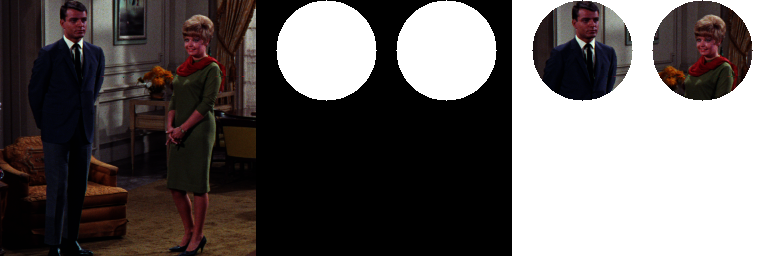

In [49]:
img = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')

mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50, (255,255,255), -1)

mask1 = np.zeros(img.shape, dtype=np.uint8)
mask1 = cv.circle(mask,(190, 50), 50, (255,255,255), -1)

result = img & mask & mask1
result[mask==0] = 255
final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

**Hasil Analisa**

*result = img & mask & mask1* <br>
Menggunakan operasi bitwise AND untuk menggabungkan citra asli dengan kedua mask

*result[mask == 0] = 255* <br>
Menetapkan nilai 255 (putih) ke piksel di luar mask pertama (mask).



*   NOT


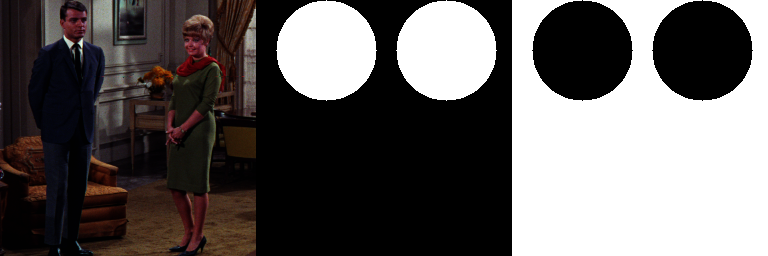

In [55]:
img = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')


mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask,(190, 50), 50, (255,255,255), -1)

result = ~img & ~mask2
result[mask==0] = 255
final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)



*   OR



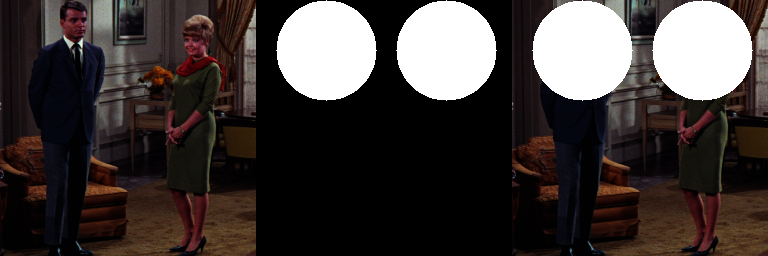

In [57]:
img = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')


mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask,(190, 50), 50, (255,255,255), -1)

result = img | mask2
final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)



*   AND


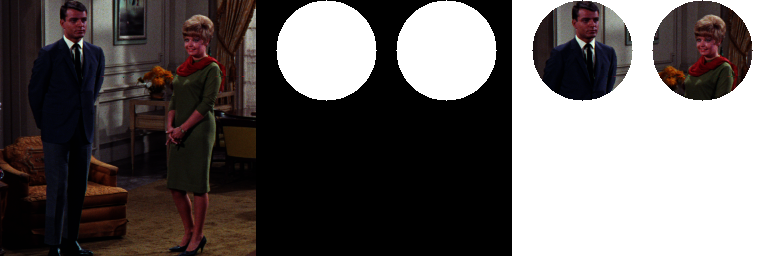

In [59]:
img = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')
mask = np.zeros(img.shape, img.dtype)
mask = cv.circle(mask, (70, 50), 50, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask,(190, 50), 50, (255,255,255), -1)

result = img & mask & mask2
result[mask==0] = 255
final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)



*   NAND


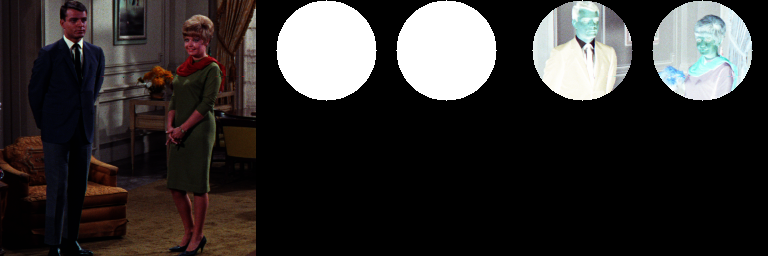

In [62]:
img = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')


mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask,(190, 50), 50, (255,255,255), -1)

result = ~img & mask2
final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)



*   XOR


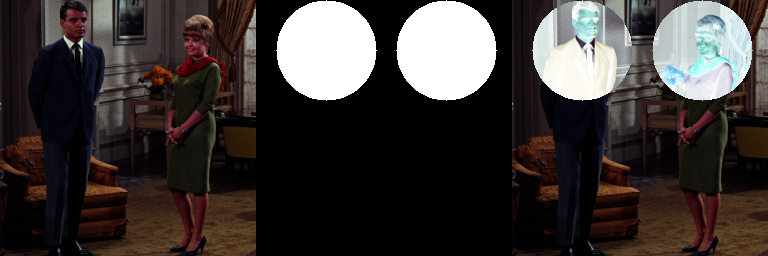

In [63]:
img = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')


mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask,(190, 50), 50, (255,255,255), -1)

result = img ^ mask2
final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

**Hasil Analisa**

Menggunakan berbagai operasi bitwise (NOT, AND, OR, XOR, NAND) untuk memanipulasi gambar dan mask. Setiap operasi memiliki efek yang berbeda pada gambar hasil:

NOT (~): Membalikkan setiap bit dari gambar atau mask. <br>

AND (&): Menghasilkan piksel yang bernilai 1 hanya jika kedua piksel input bernilai 1. <br>

OR (|): Menghasilkan piksel yang bernilai 1 jika salah satu atau kedua piksel input bernilai 1. <br>

XOR (^): Menghasilkan piksel yang bernilai 1 jika salah satu piksel input bernilai 1, tetapi tidak keduanya. <br>

NAND (~(A & B)): Menghasilkan piksel yang bernilai 1 jika salah satu atau kedua piksel input bernilai 0. Operasi ini adalah kebalikan dari AND.
